In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\nilav\\NCI Cell Lines\\Paclitaxel_metabolic_NCI.csv')
data.head(2)

,Cell Line,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,...,O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),cells,Cell names,Paclitaxel
0,Breast_BT549,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,...,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,BT549,BR:BT-549,5.573385
1,Breast_HS578T,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,...,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,HS578T,BR:HS 578T,6.502923


In [3]:
drug = data.pop('Paclitaxel')
drug.head()

0    5.573385
1    6.502923
2    6.085692
3    5.334615
4    7.409077
Name: Paclitaxel, dtype: float64

In [4]:
X = data.select_dtypes('float64')
X.head(2)

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.071269,0.029462,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,0.011203,...,0.059958,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154


In [5]:
X.fillna(0.0, inplace=True)

In [6]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [7]:
with open('C:\\Users\\nilav\\NCI Cell Lines\\common.txt', 'r+') as f:
    common = f.read().strip().split('\n')

In [8]:
common

['4-pyridoxate',
 'adenine',
 'citrate',
 'isocitrate',
 'cytidine',
 'guanosine',
 'hypoxanthine',
 'inosine',
 'lactose',
 'sucrose',
 'uracil',
 'taurocholate',
 'phosphocreatine',
 'malondialdehyde',
 'glycine',
 'citrulline',
 'acetylglycine',
 'dimethylglycine',
 'kynurenic acid',
 'thiamine',
 'betaine',
 'choline',
 'acetylcholine',
 'creatine',
 'thyroxine',
 'xanthosine',
 'pipecolic acid',
 'pyroglutamic acid',
 'methionine sulfoxide',
 'malonylcarnitine',
 'hexanoylcarnitine',
 'stearoylcarnitine',
 'sarcosine',
 'beta-alanine']

In [9]:
len(common)

34

In [10]:
cols = list(X.columns)
cols2 = []
for i in common:
    for j in cols:
        if i.lower() in j.lower():
            cols2.append(j)

In [11]:
cols2

['4-Pyridoxic acid ; 4-pyridoxate',
 'Adenine',
 '2,8-Dihydroxyadenine ; 8-Hydroxyguanine',
 'FAPy-adenine',
 'Isopentenyladenine-9-N-glucoside',
 'Nicotinamide adenine dinucleotide',
 'HMDB01487 ; Nicotinamide adenine dinucleotide - reduced',
 'Nicotinamide adenine dinucleotide phosphate',
 'HMDB00221 ; Nicotinamide adenine dinucleotide phosphate - reduced',
 'FAD ; Flavin adenine dinucleotide oxidized',
 'FADH ; Flavin adenine dinucleotide reduced',
 '6-Hydroxy flavin adenine dinucleotide',
 'Citrate ; Isocitrate',
 '(2S,3R)-3-hydroxybutane-1,2,3-tricarboxylate ; 2-Methylcitric acid ; 2-methylcitrate(3-) ; Homocitric acid ; Methylisocitric acid',
 'Citrate ; Isocitrate',
 '5-Methyldeoxycytidine',
 'Cytidine',
 '5-Methylcytidine',
 "Cytidine 2',3'-cyclic phosphate",
 "Cytidine 2'-phosphate ; Cytidine monophosphate",
 'CTP ; Cytidine triphosphate',
 'CMP-N-acetyl-beta-neuraminate(2-) ; Cytidine monophosphate N-acetylneuraminic acid',
 '8-Hydroxy-deoxyguanosine ; Guanosine',
 "1-Methylg

In [12]:
len(cols2)

144

In [13]:
X = X[cols2]

In [14]:
X.shape

(49, 144)

In [15]:
labels = []
drug_mean = drug.mean()
for i in drug:
    if i >= drug_mean:
        labels.append('N')
    else:
        labels.append('R')
y = pd.Series(labels)

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

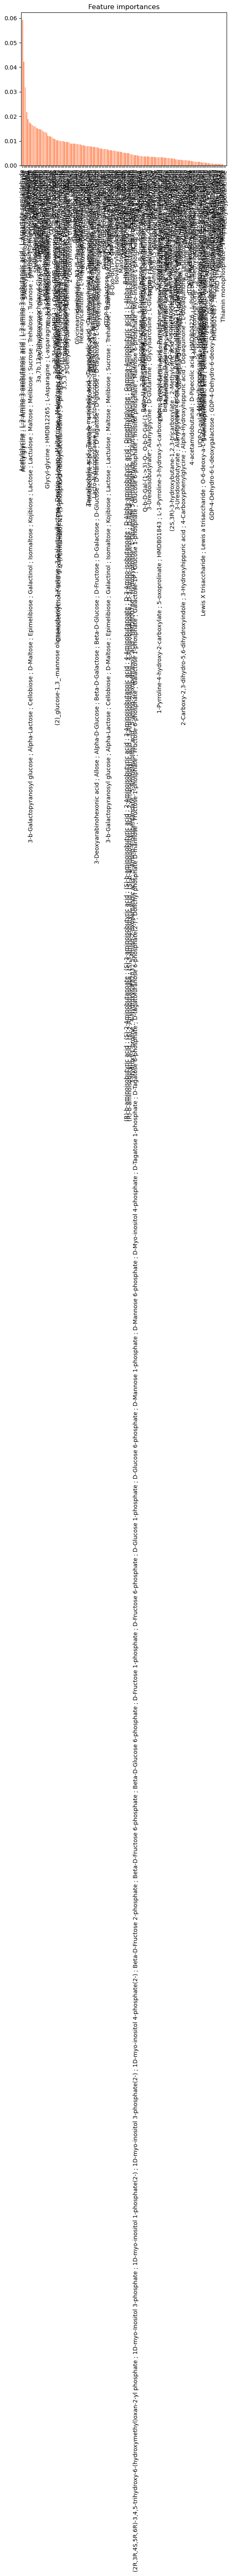

In [17]:
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 43)

model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

sfm = SelectFromModel(model, threshold = 0.004)
sfm.fit(X_train, y_train)

X_train_transformed = pd.DataFrame(data = sfm.transform(X_train), columns = X_train.columns[sfm.get_support(0)])
X_test_transformed = pd.DataFrame(data = sfm.transform(X_test), columns = X_test.columns[sfm.get_support(0)])

model.fit(X_train_transformed, y_train)
prediction = model.predict_proba(X_test_transformed)[:, 1]
y_pred = model.predict(X_test_transformed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.43      0.43      0.43         7

    accuracy                           0.53        17
   macro avg       0.51      0.51      0.51        17
weighted avg       0.53      0.53      0.53        17



Text(50.722222222222214, 0.5, 'True Labels')

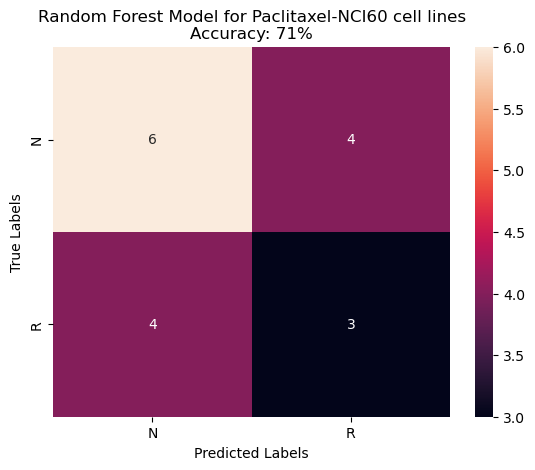

In [19]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('Random Forest Model for Paclitaxel-NCI60 cell lines\nAccuracy: 71%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

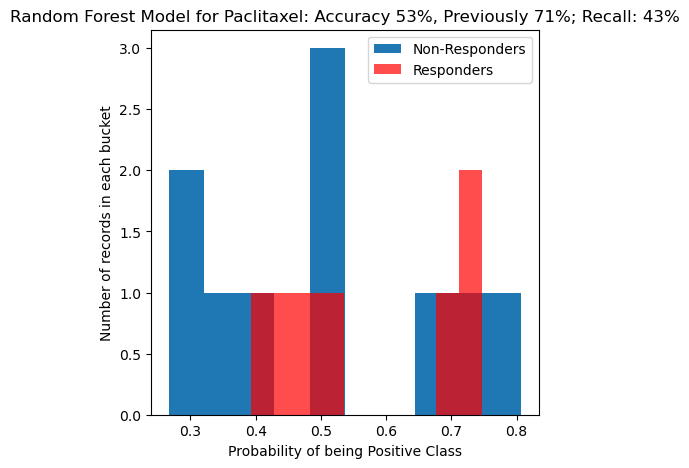

In [25]:
plt.figure(figsize=(5, 5))
plt.hist(prediction[y_test==0], label='Non-Responders')
plt.hist(prediction[y_test==1], label='Responders', alpha=0.7, color = 'r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.title('Random Forest Model for Paclitaxel: Accuracy 53%, Previously 71%; Recall: 43%')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [21]:
model2 = SVC(kernel = 'linear', C=1, gamma='auto', probability=True)
model2.fit(X_train_transformed, y_train)
prediction2 = model2.predict_proba(X_test_transformed)[:, 1]
y_pred = model2.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.22      0.29      0.25         7

    accuracy                           0.29        17
   macro avg       0.30      0.29      0.29        17
weighted avg       0.31      0.29      0.30        17



Text(50.722222222222214, 0.5, 'True labels')

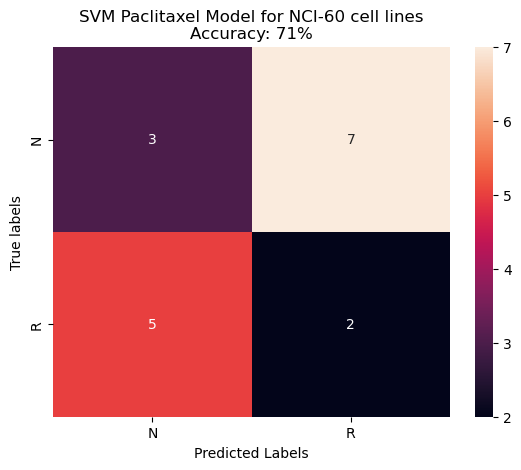

In [22]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('SVM Paclitaxel Model for NCI-60 cell lines\nAccuracy: 71%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True labels')

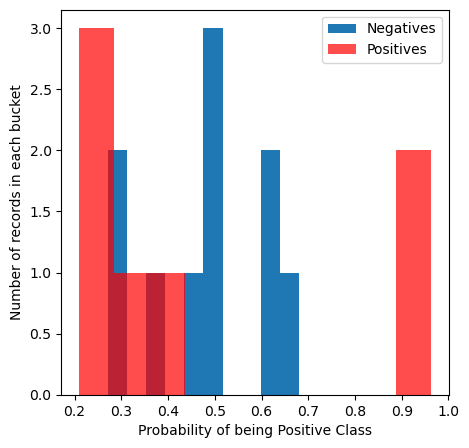

In [23]:
plt.figure(figsize=(5,5))
plt.hist(prediction2[y_test==0], label='Negatives')
plt.hist(prediction2[y_test==1], label='Positives', alpha=0.7, color = 'r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [24]:
model3 = XGBClassifier()
model3.fit(X_train_transformed, y_train)
prediction3 = model3.predict_proba(X_test_transformed)[:, 1]
y_pred = model3.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

ValueError: feature_names must be unique